<h1 style="text-align: center;">Baseball Case Study</h1> 
By Mónica Atiaga

Batch - DSNB1222

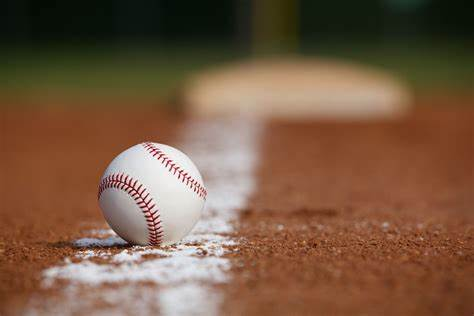

## Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
### Input features
- W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
- R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
- AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
- H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
- 2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
- 3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
- HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
- BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
- SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
- SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
- RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
- ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
- ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
- CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
- SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
- SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
- E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

#### Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

### Dataset Link
For downloading the dataset, use the link given below. 

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"
df = pd.read_csv(url)
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [4]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (30, 17)

The column headers in the dataset: Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


This dataset contains 30 rows and 17 columns. Out of which 1 is the target variable "W" and the remaining 16 are independent variables described in the above section Input features.

In [5]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are two types of data (int64 and float64 ) present in the dataset.
ERA is float64, and the other columns are integers(int64)

There are no null values presented in the dataset.  

## 1.2 Missing values

In [7]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
W              0           0.0
R              0           0.0
AB             0           0.0
H              0           0.0
2B             0           0.0
3B             0           0.0
HR             0           0.0
BB             0           0.0
SO             0           0.0
SB             0           0.0
RA             0           0.0
ER             0           0.0
ERA            0           0.0
CG             0           0.0
SHO            0           0.0
SV             0           0.0
E              0           0.0

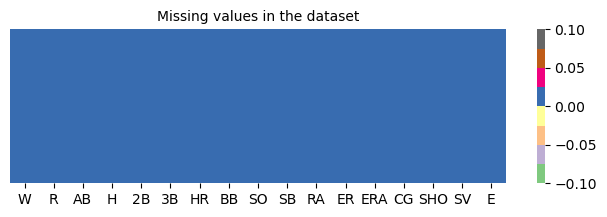

In [8]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

The dataset does not contain null values. Now we can go on with the EDA.

## 1.3 Features Analysis
### 1.3.1 Unique values

In [10]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
W                      24    int64
R                      28    int64
AB                     29    int64
H                      29    int64
2B                     22    int64
3B                     23    int64
HR                     27    int64
BB                     29    int64
SO                     29    int64
SB                     27    int64
RA                     30    int64
ER                     30    int64
ERA                    30  float64
CG                      9    int64
SHO                    12    int64
SV                     20    int64
E                      21    int64

About the number of unique values:
- The target variable W has 24 unique values of 30 total in the dataset, so we can infer that we need to build a regression model to address this project. 
- The majority of columns have almost the same unique values as the rows in the dataset despite being integers.
- The columns CG and SHO have limited unique values, 9 and 12 respectively.

#### 1.3.1.1 Dependent variable unique values

In [32]:
# Inspect the unique values of the target variable
column = 'W'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")

Feature W:
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64
Unique values: [63, 64, 67, 68, 71, 74, 76, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 90, 92, 93, 95, 97, 98, 100]
# unique values: 24



As we can see the target variable has 24 unique values of the 30 rows in the dataset. This is a regression problem.

#### 1.3.1.2 Independent variables unique values

In [23]:
# Firs we are going to Inspect the values present in CG and SHO column 
for column in ['CG', 'SHO']:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"Unique values: {sorted(df[column].unique())}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature CG:
1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64
Unique values: [0, 1, 2, 3, 4, 5, 6, 7, 11]
# unique values: 9

Feature SHO:
12    7
10    5
13    3
8     2
9     2
4     2
15    2
21    2
7     2
14    1
18    1
6     1
Name: SHO, dtype: int64
Unique values: [4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 18, 21]
# unique values: 12



The CG and SHO columns will be analyzed as categorical variables.

In [29]:
# Inspect the values present in each column 
for column in df.columns[1:]:
    if (column not in ['CG', 'SHO']):
        print(f"Feature {column}:")
        print(f"Unique values: {sorted(df[column].unique())}")
        print(f"# unique values: {df[column].nunique()}\n")

Feature R:
Unique values: [573, 613, 622, 626, 640, 644, 647, 650, 655, 656, 661, 667, 669, 683, 689, 694, 696, 697, 703, 713, 720, 724, 729, 737, 748, 751, 764, 891]
# unique values: 28

Feature AB:
Unique values: [5385, 5417, 5420, 5428, 5439, 5457, 5459, 5463, 5467, 5480, 5484, 5485, 5491, 5509, 5511, 5527, 5529, 5533, 5544, 5565, 5567, 5571, 5572, 5575, 5600, 5605, 5631, 5640, 5649]
# unique values: 29

Feature H:
Unique values: [1324, 1331, 1341, 1346, 1349, 1351, 1361, 1363, 1370, 1374, 1378, 1379, 1381, 1382, 1383, 1386, 1395, 1397, 1405, 1419, 1420, 1462, 1479, 1480, 1486, 1494, 1495, 1497, 1515]
# unique values: 29

Feature 2B:
Unique values: [236, 243, 246, 251, 257, 260, 262, 263, 265, 272, 274, 277, 278, 279, 288, 289, 292, 294, 295, 300, 303, 308]
# unique values: 22

Feature 3B:
Unique values: [13, 17, 18, 19, 20, 21, 22, 26, 27, 29, 30, 32, 33, 34, 36, 37, 39, 40, 42, 44, 46, 48, 49]
# unique values: 23

Feature HR:
Unique values: [100, 120, 130, 136, 137, 139, 140, 141,

The rest of the independent variables are numerical.

### 1.3.2 Summary statistics of the numerical and non-numerical variables

In [33]:
# Summary statistics of numerical columns
stats = df.describe()
stats

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [34]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

H      21.033333
AB      6.266667
HR      5.133333
E       3.333333
SV      1.066667
CG      0.466667
3B      0.300000
SB      0.000000
W      -0.033333
ERA    -0.068667
SHO    -0.700000
R      -0.766667
2B     -0.766667
BB     -3.900000
RA     -7.266667
ER     -8.666667
SO    -13.300000
dtype: float64

In [89]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

R      85.243160
SO     62.281060
ER     22.885094
RA     11.550657
SB      4.869550
HR      4.720049
E       3.748889
SV      3.194663
CG      2.006388
SHO     1.459645
ERA     0.175490
W      -1.873576
H      -2.815179
2B     -2.924143
3B     -3.204710
AB     -8.201411
BB    -13.207451
dtype: float64

**Observations:**

- The summary of the dataset looks perfect since there are no negative/invalid values present.
- The counts of all the columns are the same which means there are no missing values in the dataset.
- The dependent variable {W} is numerical.
- The mean value is larger than the median(50%) in columns {H, AB, HR, E, SV, 3B}, which means the data is skewed to the right in these columns.
- In the column {SB} the median (50%) and the mean are the same.
- The data in the columns {W, ERA, R, 2B, BB, RA, ER, SO} have a difference between the mean value less than the median which means the data is skewed to the left.
- The dataset could present outliers in the columns {R, SO, ER, RA, SB, HR, E, SV}, however in the univariate analysis of each feature we will verify it.
- The features are not on the same scale. AB has a mean of 5516.26 while ERA has a mean value of 3.96. Features should be on the same scale for algorithms such as logistic regression to converge smoothly.

### 1.3.3 Duplicates

In [36]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 17)

There are no duplicate values in the dataset.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Target feature

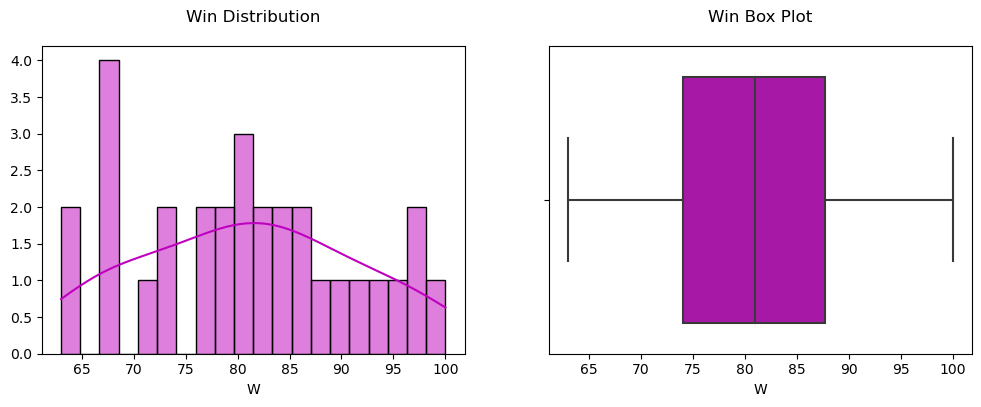

Skewness of Win : 0.047088688953686085


In [38]:
#Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['W'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['W'], ax=axes[1], color='m')

axes[0].set_title('Win Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Win Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of RI
print(f"Skewness of Win : {df.W.skew()}")

The distribution of W is almost normal. There are not outliers present in the Box plot of W.

#### 1.4.1.2 Independent categorical variables 

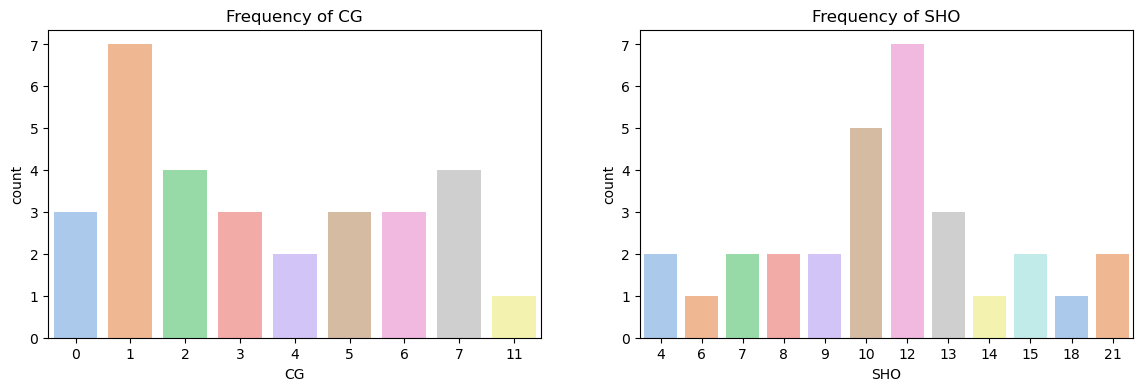

In [46]:
categorical_col = ['CG', 'SHO']

# Visualize the categorical variables
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='pastel')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

- The CG column has 9 unique values, and the SHO column has 12.
- For the CG column the most frequent value is 1, and for SHO is 12.

#### 1.4.1.3 Independent numerical variables 

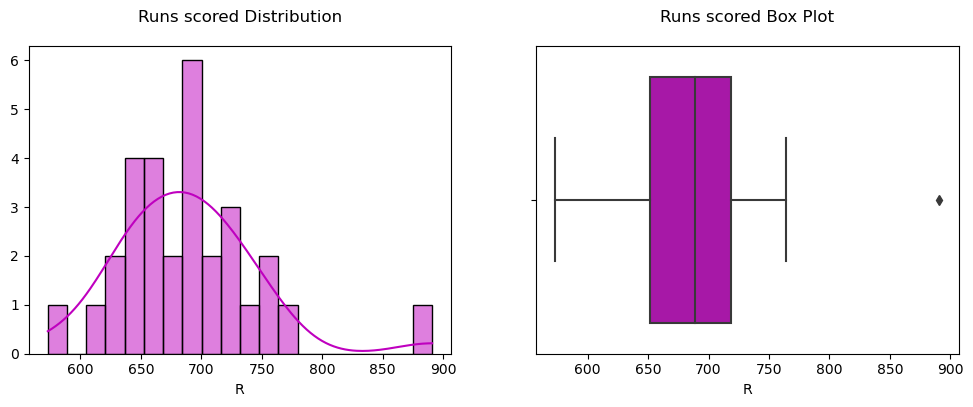

Skewness of R : 1.2007863569707353


In [49]:
#Visualize Runs scored distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['R'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['R'], ax=axes[1], color='m')

axes[0].set_title('Runs scored Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Runs scored Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of R
print(f"Skewness of R : {df.R.skew()}")

In [76]:
print(f"Median / 50th percentile of R : {df.R.quantile(0.5)}")
print(f"Mean of R : {df.R.mean()}")
print(f"Skewness of R : {df.R.skew()} ")

Median / 50th percentile of R : 689.0
Mean of R : 688.2333333333333
Skewness of R : 1.2007863569707353 


The distribution of R (Run scored) is skewed to the right because of the present an outlier value since if we check the stats of this feature we could conclude that the distribution is skewed to the left.

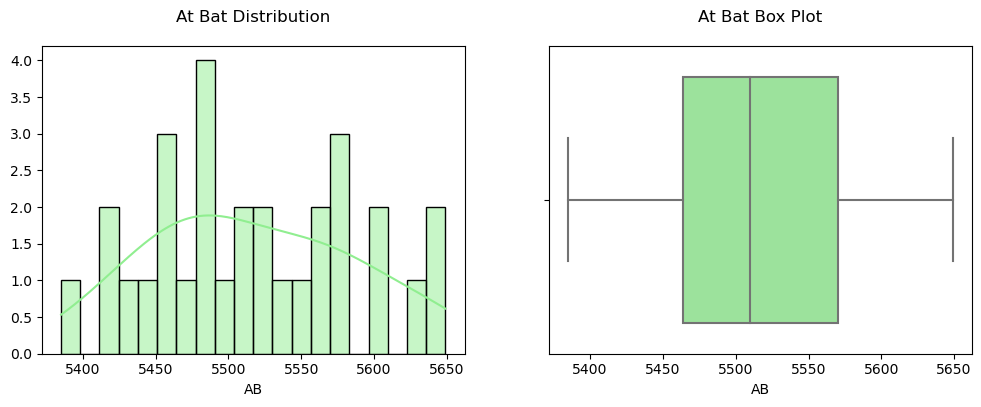

Skewness of AB : 0.18343655908507983


In [50]:
#Visualize AB distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['AB'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['AB'], ax=axes[1], color='lightgreen')

axes[0].set_title('At Bat Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('At Bat Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of AB
print(f"Skewness of AB : {df.AB.skew()}")

The distribution of AB is slightly skewed to the right. There are no outliers present in the Box plot of AB.

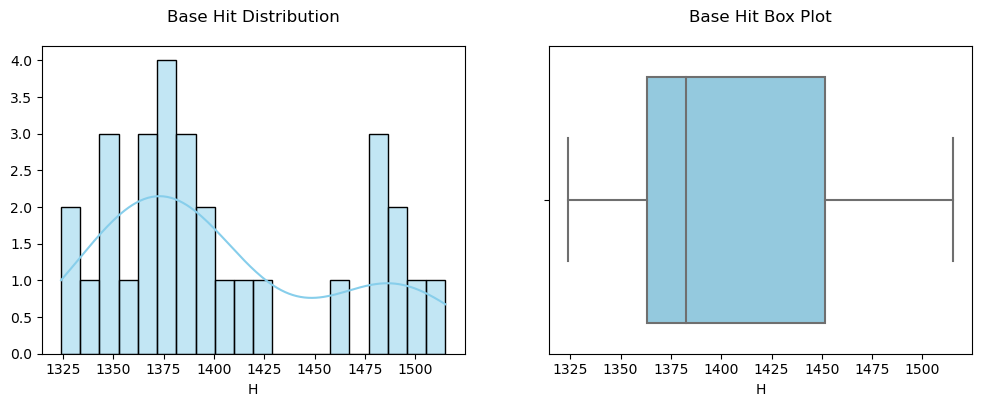

Skewness of H : 0.6702537173217267


In [51]:
#Visualize Base Hit distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['H'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['H'], ax=axes[1], color='skyblue')

axes[0].set_title('Base Hit Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Base Hit Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of H
print(f"Skewness of H : {df.H.skew()}")

The distribution of H(Base Hit) is skewed to the right. There are no outliers present in the Box plot of H.

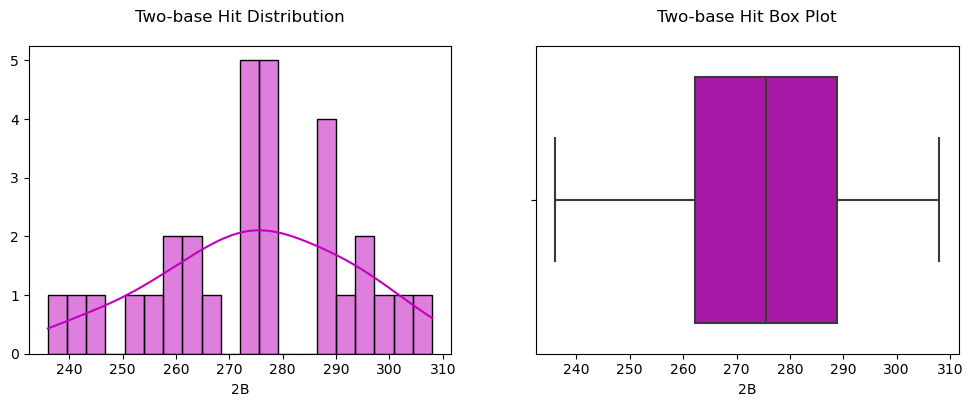

Skewness of 2B : -0.23064991757259148


In [52]:
#Visualize 2B distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['2B'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['2B'], ax=axes[1], color='m')

axes[0].set_title('Two-base Hit Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Two-base Hit Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of 2B
print(f"Skewness of 2B : {df['2B'].skew()}")

The distribution of 2B is slightly skewed to the left. There are no outliers present in the Box plot of 2B.

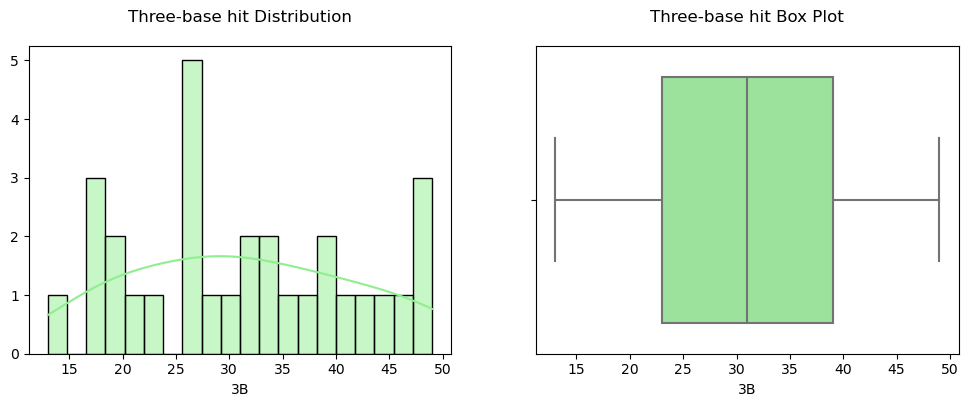

Skewness of 3B : 0.129502450836424


In [53]:
#Visualize 3B distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['3B'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['3B'], ax=axes[1], color='lightgreen')

axes[0].set_title('Three-base hit Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Three-base hit Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of 3B
print(f"Skewness of 3B : {df['3B'].skew()}")

The distribution of 3B is slightly skewed to the right. There are no outliers present in the Box plot of 3B.

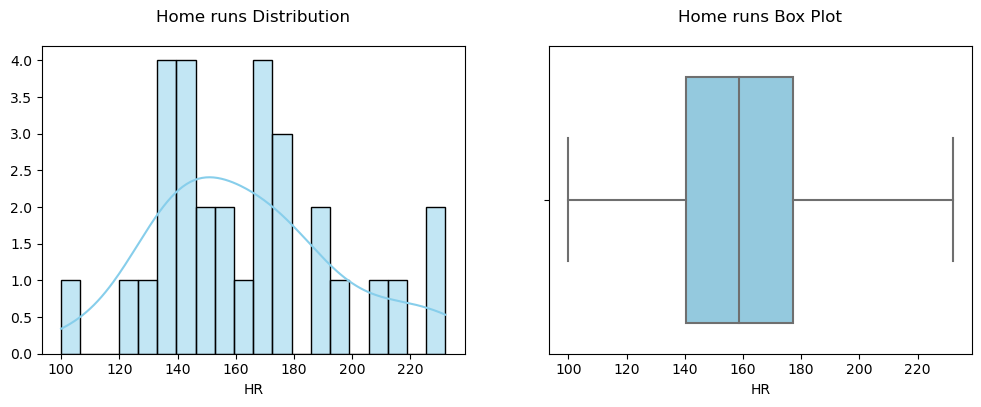

Skewness of HR : 0.5164407366297173


In [57]:
#Visualize Home runs distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['HR'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['HR'], ax=axes[1], color='skyblue')

axes[0].set_title('Home runs Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Home runs Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of HR
print(f"Skewness of HR : {df.HR.skew()}")

The distribution of HR is slightly skewed to the right. There are no outliers present in the Box plot of HR.

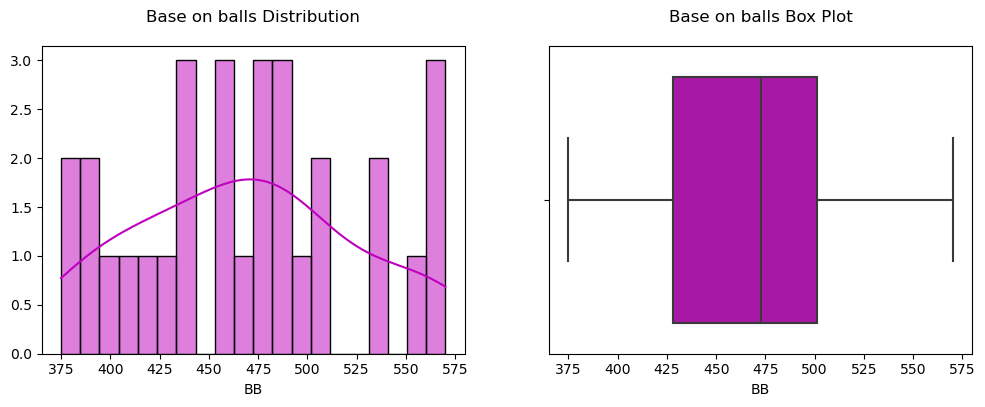

Skewness of BB : 0.15849848440330838


In [55]:
#Visualize BB distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['BB'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['BB'], ax=axes[1], color='m')

axes[0].set_title('Base on balls Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Base on balls Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of BB
print(f"Skewness of BB : {df['BB'].skew()}")

In [79]:
print(f"Median / 50th percentile of BB : {df['BB'].quantile(0.5)}")
print(f"Mean of BB : {df['BB'].mean()}")
print(f"Skewness of BB : {df['BB'].skew()} ")

Median / 50th percentile of BB : 473.0
Mean of BB : 469.1
Skewness of BB : 0.15849848440330838 


The distribution of BB is slightly skewed to the right even though the mean is less than the median. There are no outliers present in the Box plot of BB.

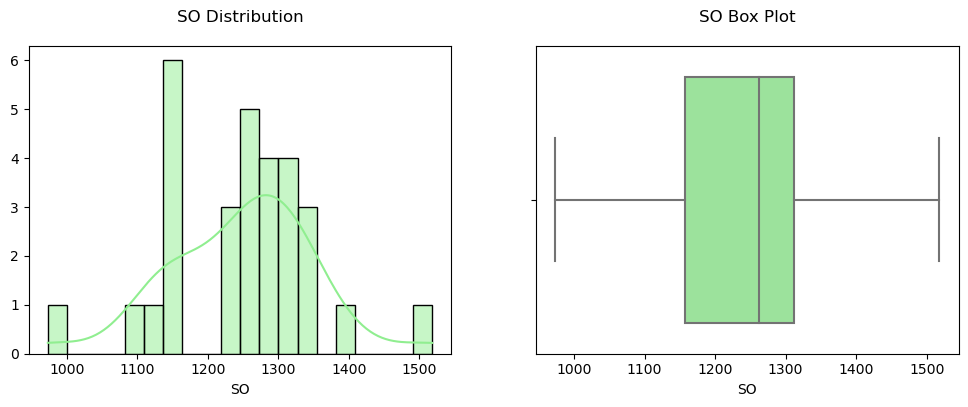

Skewness of SO : -0.1560654813644833


In [56]:
#Visualize SO distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['SO'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['SO'], ax=axes[1], color='lightgreen')

axes[0].set_title('SO Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('SO Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of SO
print(f"Skewness of SO : {df['SO'].skew()}")

The distribution of SO is slightly skewed to the left. There are no outliers present in the Box plot of SO.

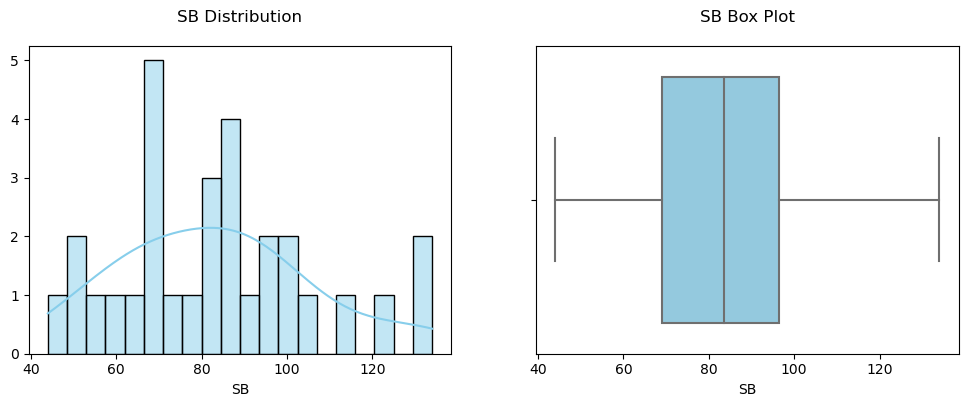

Skewness of SB : 0.4798928679573835


In [60]:
#Visualize SB distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['SB'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['SB'], ax=axes[1], color='skyblue')

axes[0].set_title('SB Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('SB Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of SB
print(f"Skewness of SB : {df['SB'].skew()}")

In [87]:
print(f"Median / 50th percentile of SB : {df['SB'].quantile(0.5)}")
print(f"Mean of SB : {df['SB'].mean()}")
print(f"Skewness of SB : {df['SB'].skew()} ")

Median / 50th percentile of SB : 83.5
Mean of SB : 83.5
Skewness of SB : 0.4798928679573835 


The distribution of SB is skewed to the right even though the mean and the median are the same. There are no outliers present in the Box plot of SB.

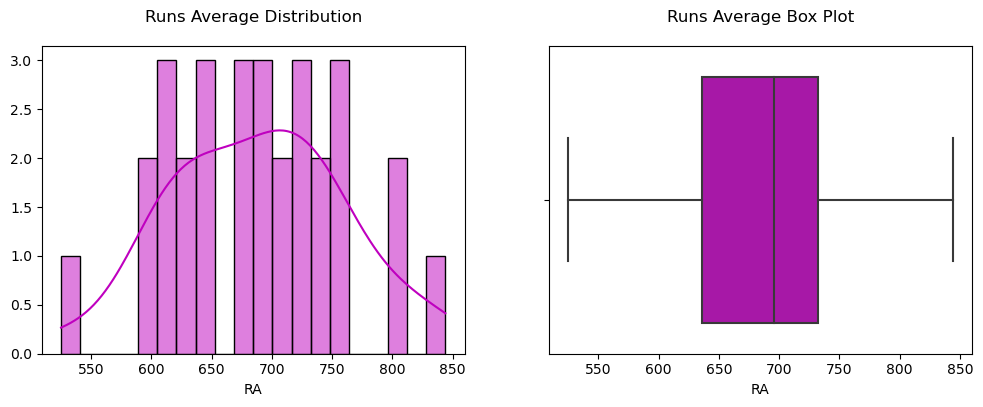

Skewness of RA : 0.04573397531336112


In [61]:
#Visualize Run Average distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['RA'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['RA'], ax=axes[1], color='m')

axes[0].set_title('Runs Average Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Runs Average Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of RA
print(f"Skewness of RA : {df.RA.skew()}")

In [82]:
print(f"Median / 50th percentile of RA : {df['RA'].quantile(0.5)}")
print(f"Mean of RA : {df['RA'].mean()}")
print(f"Skewness of RA : {df['RA'].skew()} ")

Median / 50th percentile of RA : 695.5
Mean of RA : 688.2333333333333
Skewness of RA : 0.04573397531336112 


The distribution of RA is slightly skewed to the right even though the mean is less than the median. There are no outliers present in the Box plot of RA.

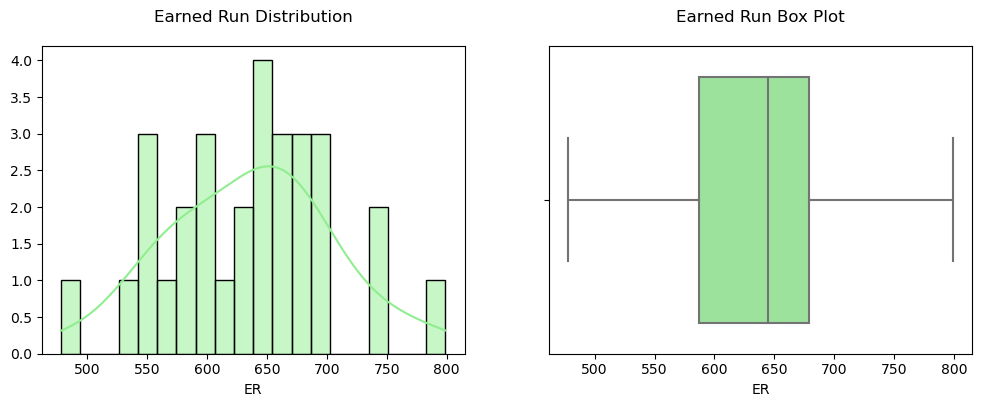

Skewness of ER : 0.05870979570981254


In [62]:
#Visualize Earned Run distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['ER'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['ER'], ax=axes[1], color='lightgreen')

axes[0].set_title('Earned Run Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Earned Run Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of ER
print(f"Skewness of ER : {df.ER.skew()}")

In [83]:
print(f"Median / 50th percentile of ER : {df['ER'].quantile(0.5)}")
print(f"Mean of ER : {df['ER'].mean()}")
print(f"Skewness of ER : {df['ER'].skew()} ")

Median / 50th percentile of ER : 644.5
Mean of ER : 635.8333333333334
Skewness of ER : 0.05870979570981254 


The distribution of ER is slightly skewed to the right even though the mean is less than the median. There are no outliers present in the Box plot of ER.

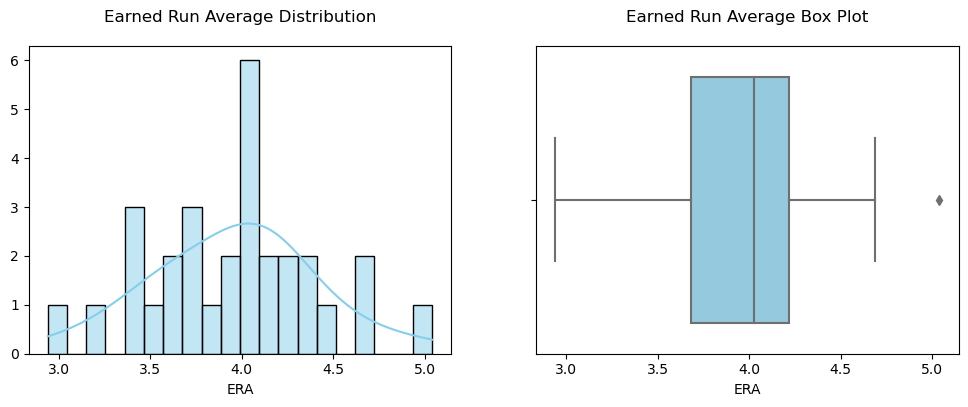

Skewness of ERA : 0.053331339494040286


In [63]:
#Visualize Earned Run Average distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['ERA'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['ERA'], ax=axes[1], color='skyblue')

axes[0].set_title('Earned Run Average Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Earned Run Average Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of ERA
print(f"Skewness of ERA : {df.ERA.skew()}")

In [84]:
print(f"Median / 50th percentile of ERA : {df['ERA'].quantile(0.5)}")
print(f"Mean of ERA : {df['ERA'].mean()}")
print(f"Skewness of ERA : {df['ERA'].skew()} ")

Median / 50th percentile of ERA : 4.025
Mean of ERA : 3.9563333333333337
Skewness of ERA : 0.053331339494040286 


The distribution of ERA is slightly skewed to the right even though the mean is less than the median. There are outliers present in the Box plot of ERA.

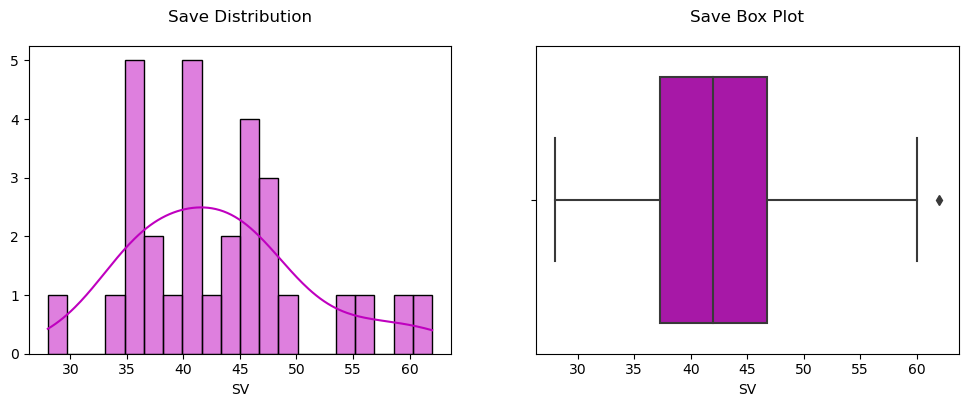

Skewness of SV : 0.6575235461553925


In [64]:
#Visualize Save distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['SV'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['SV'], ax=axes[1], color='m')

axes[0].set_title('Save Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Save Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of SV
print(f"Skewness of SV : {df.SV.skew()}")

The distribution of SV is skewed to the right. There are outliers present in the Box plot of SV.

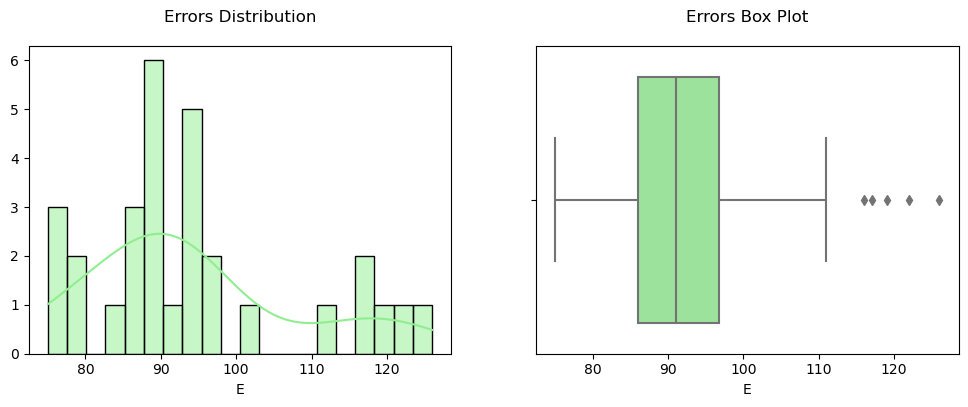

Skewness of E : 0.8901318267689016


In [65]:
#Visualize Errors distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['E'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['E'], ax=axes[1], color='lightgreen')

axes[0].set_title('Errors Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Errors Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of E
print(f"Skewness of E : {df.E.skew()}")

The distribution of E is skewed to the right. There are outliers present in the Box plot of E.

#### 1.4.1.4 Univariate Boxplot

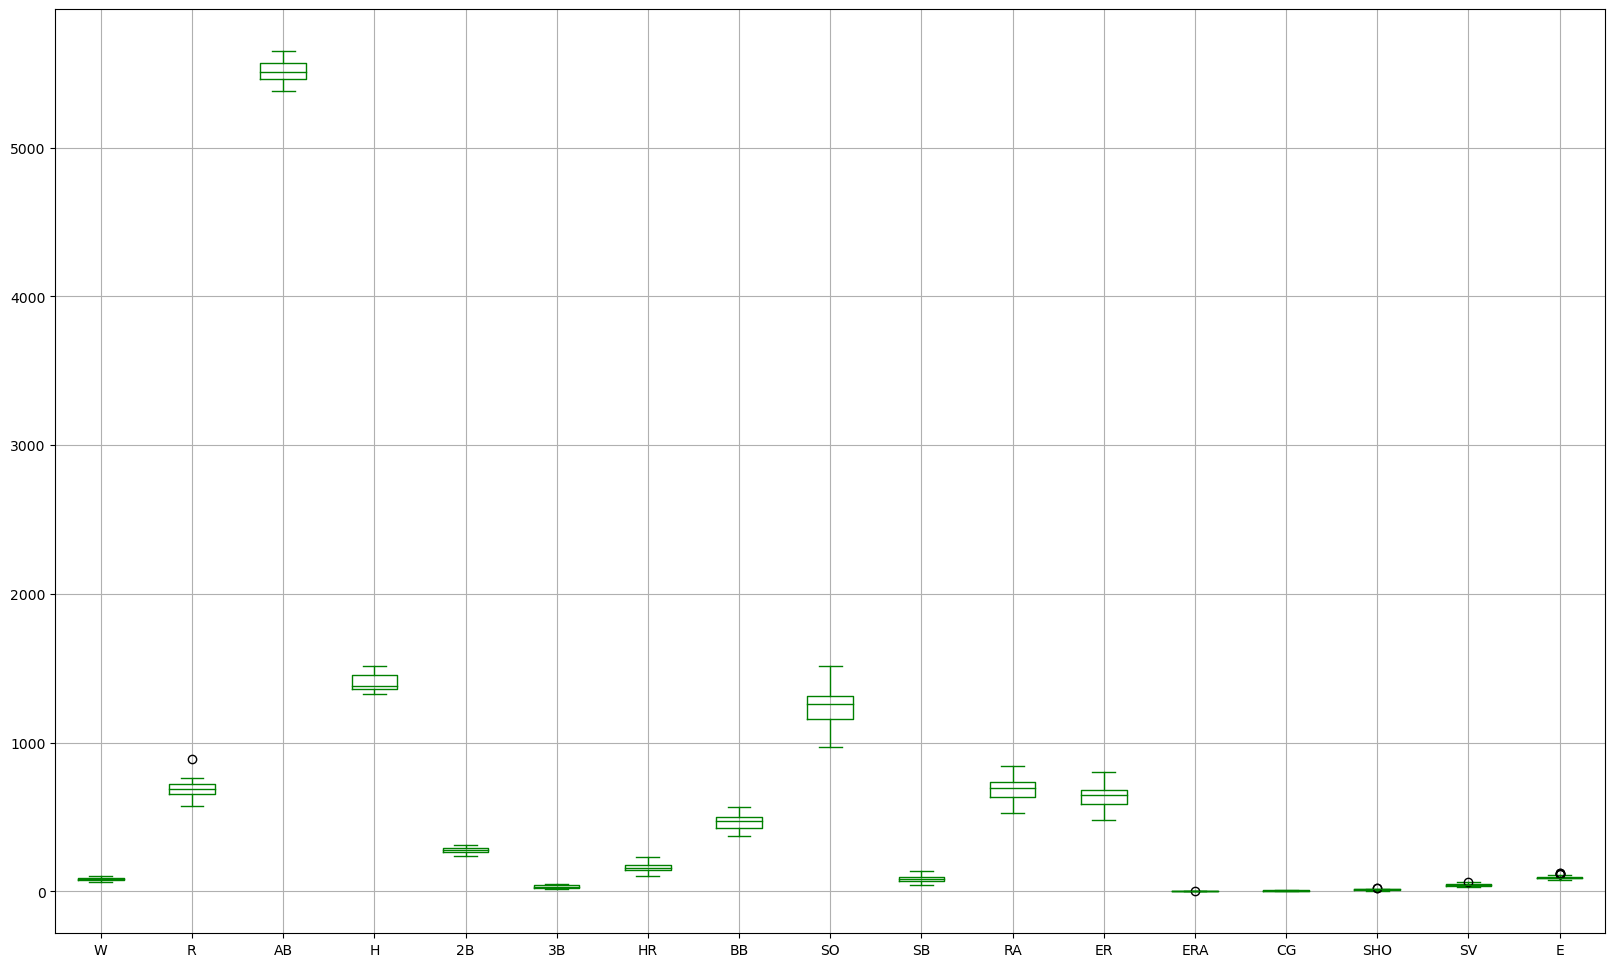

In [98]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='green')
plt.show()

The values are in different scales, so later we will scale the data.

#### 1.4.2  Bivariate Analysis

#### 1.4.2.1 Target column vs Complete Game feature

In [91]:
categorical_col

['CG', 'SHO']

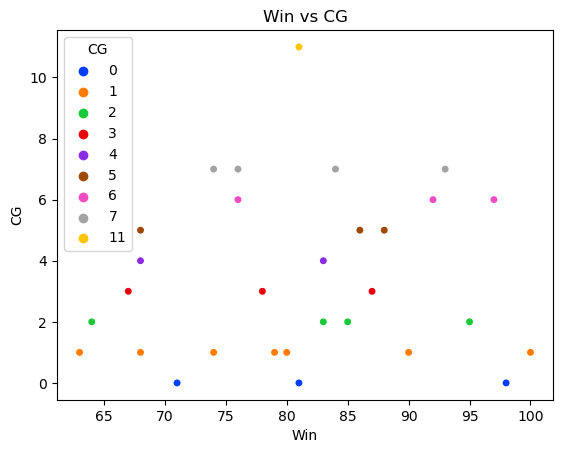

In [96]:
col = categorical_col[0]
sns.scatterplot(x="W", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.xlabel("Win")
plt.ylabel(f"{col}")
plt.title(f"Win vs {col}")
plt.show()

There is no clear relationship between the CG variable and the target.

#### 1.4.2.2 Target column vs Shutout feature 

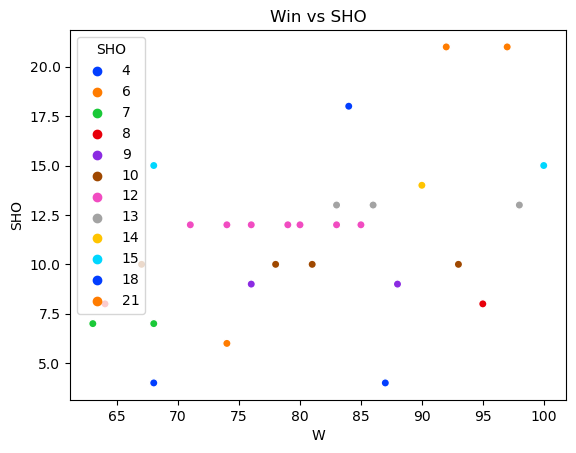

In [93]:
col = categorical_col[1]
sns.scatterplot(x="W", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"Win vs {col}")
plt.show()

There is no clear relationship between the SHO variable and the target.

 #### 1.4.2.3 Target column vs numerical features

In [114]:
# Selecting the features to analyze as numerical columns
numerical_cols = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'SV', 'E']
len(numerical_cols)

14

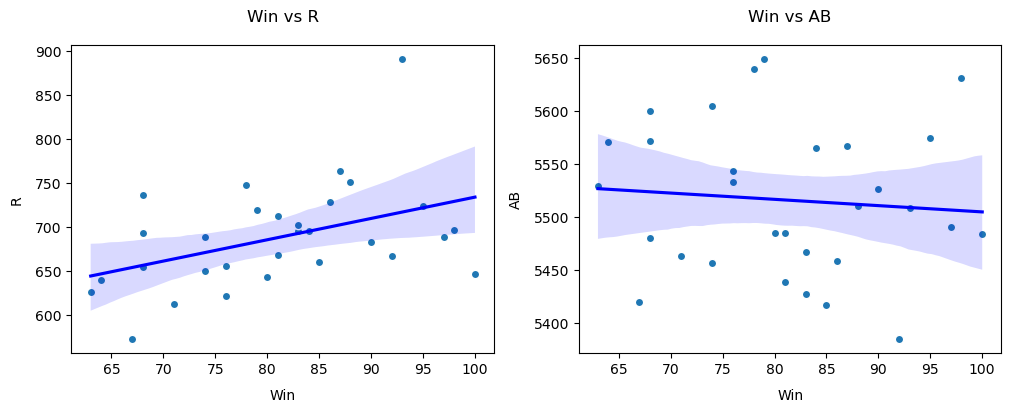

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# left plot
col = numerical_cols[0]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='b')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# right plot
col = numerical_cols[1]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

- The R feature has a positive relationship with the target.
- The AB feature has a slighly negative relationship with the target.

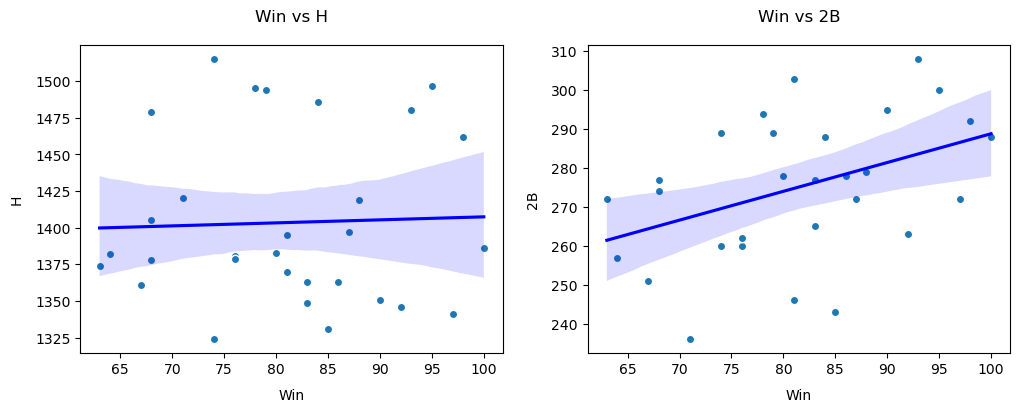

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# left plot
col = numerical_cols[2]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='b')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# right plot
col = numerical_cols[3]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

- The H feature has a slighly positive relationship with the target.
- The 2B feature has a positive relationship with the target.

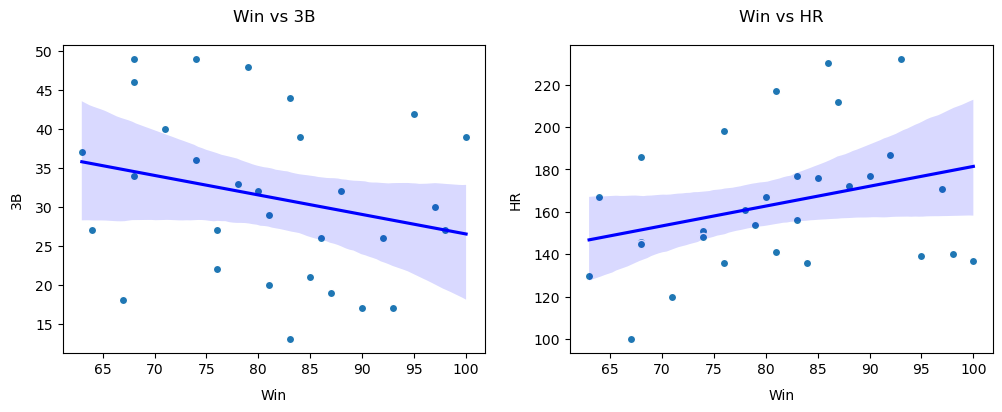

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# left plot
col = numerical_cols[4]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='b')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# right plot
col = numerical_cols[5]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

- The 3B feature has a negative relationship with the target.
- The HR feature has a positive relationship with the target.

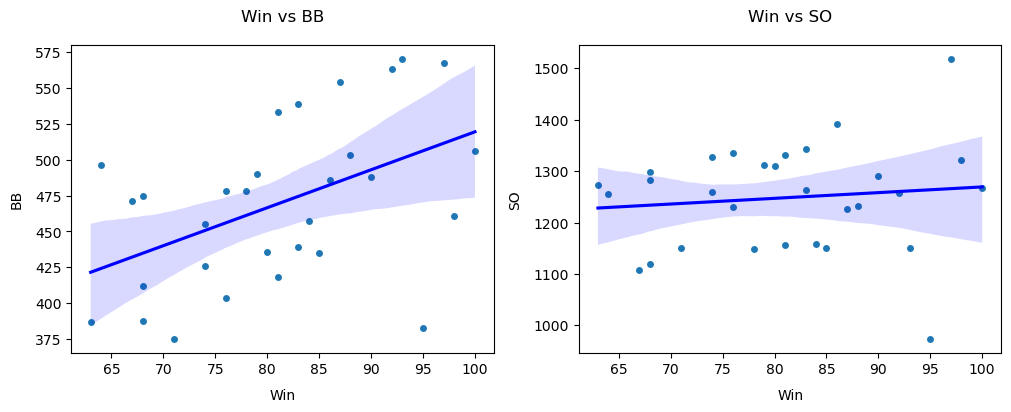

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# left plot
col = numerical_cols[6]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='b')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# right plot
col = numerical_cols[7]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

- The BB feature has a positive relationship with the target.
- The SO feature has a slighly positive relationship with the target.

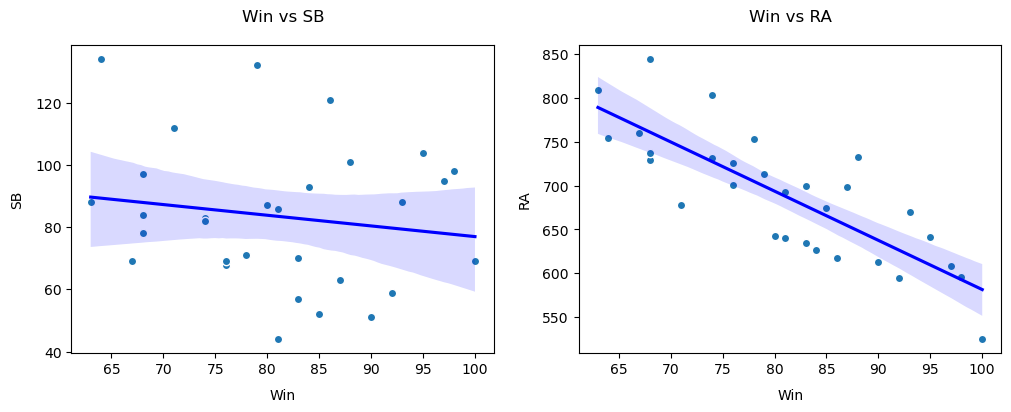

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# left plot
col = numerical_cols[8]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='b')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# right plot
col = numerical_cols[9]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

- The SB and RA feature have a negative relationship with the target.

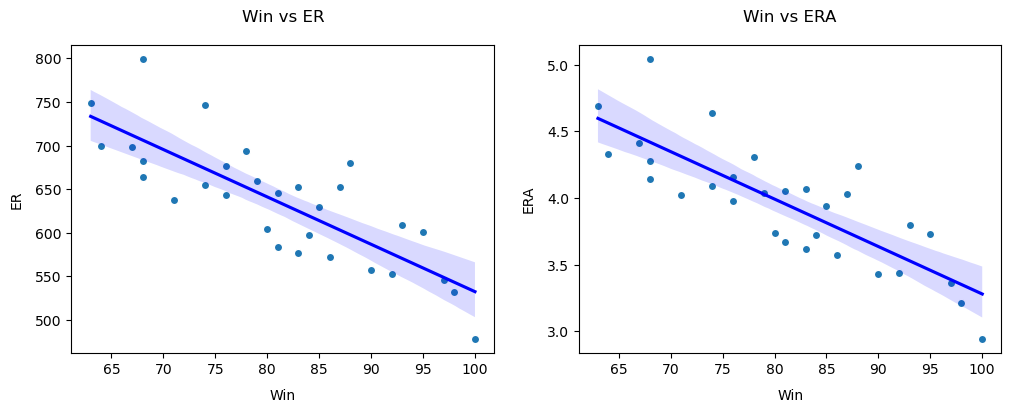

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# left plot
col = numerical_cols[10]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='b')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# right plot
col = numerical_cols[11]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

- The ER and ERA feature have a negative relationship with the target.

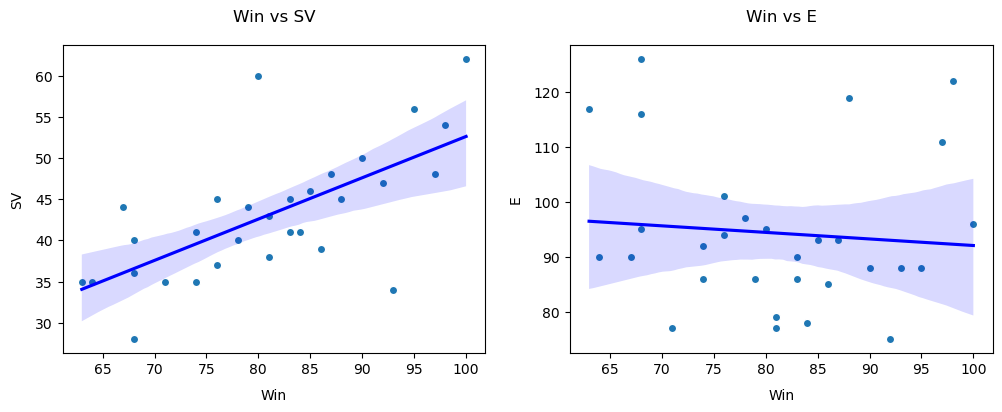

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# left plot
col = numerical_cols[12]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='b')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# right plot
col = numerical_cols[13]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

- The SV feature has a positive relationship with the target.
- The E feature has a slighly negative relationship with the target.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Pairplot

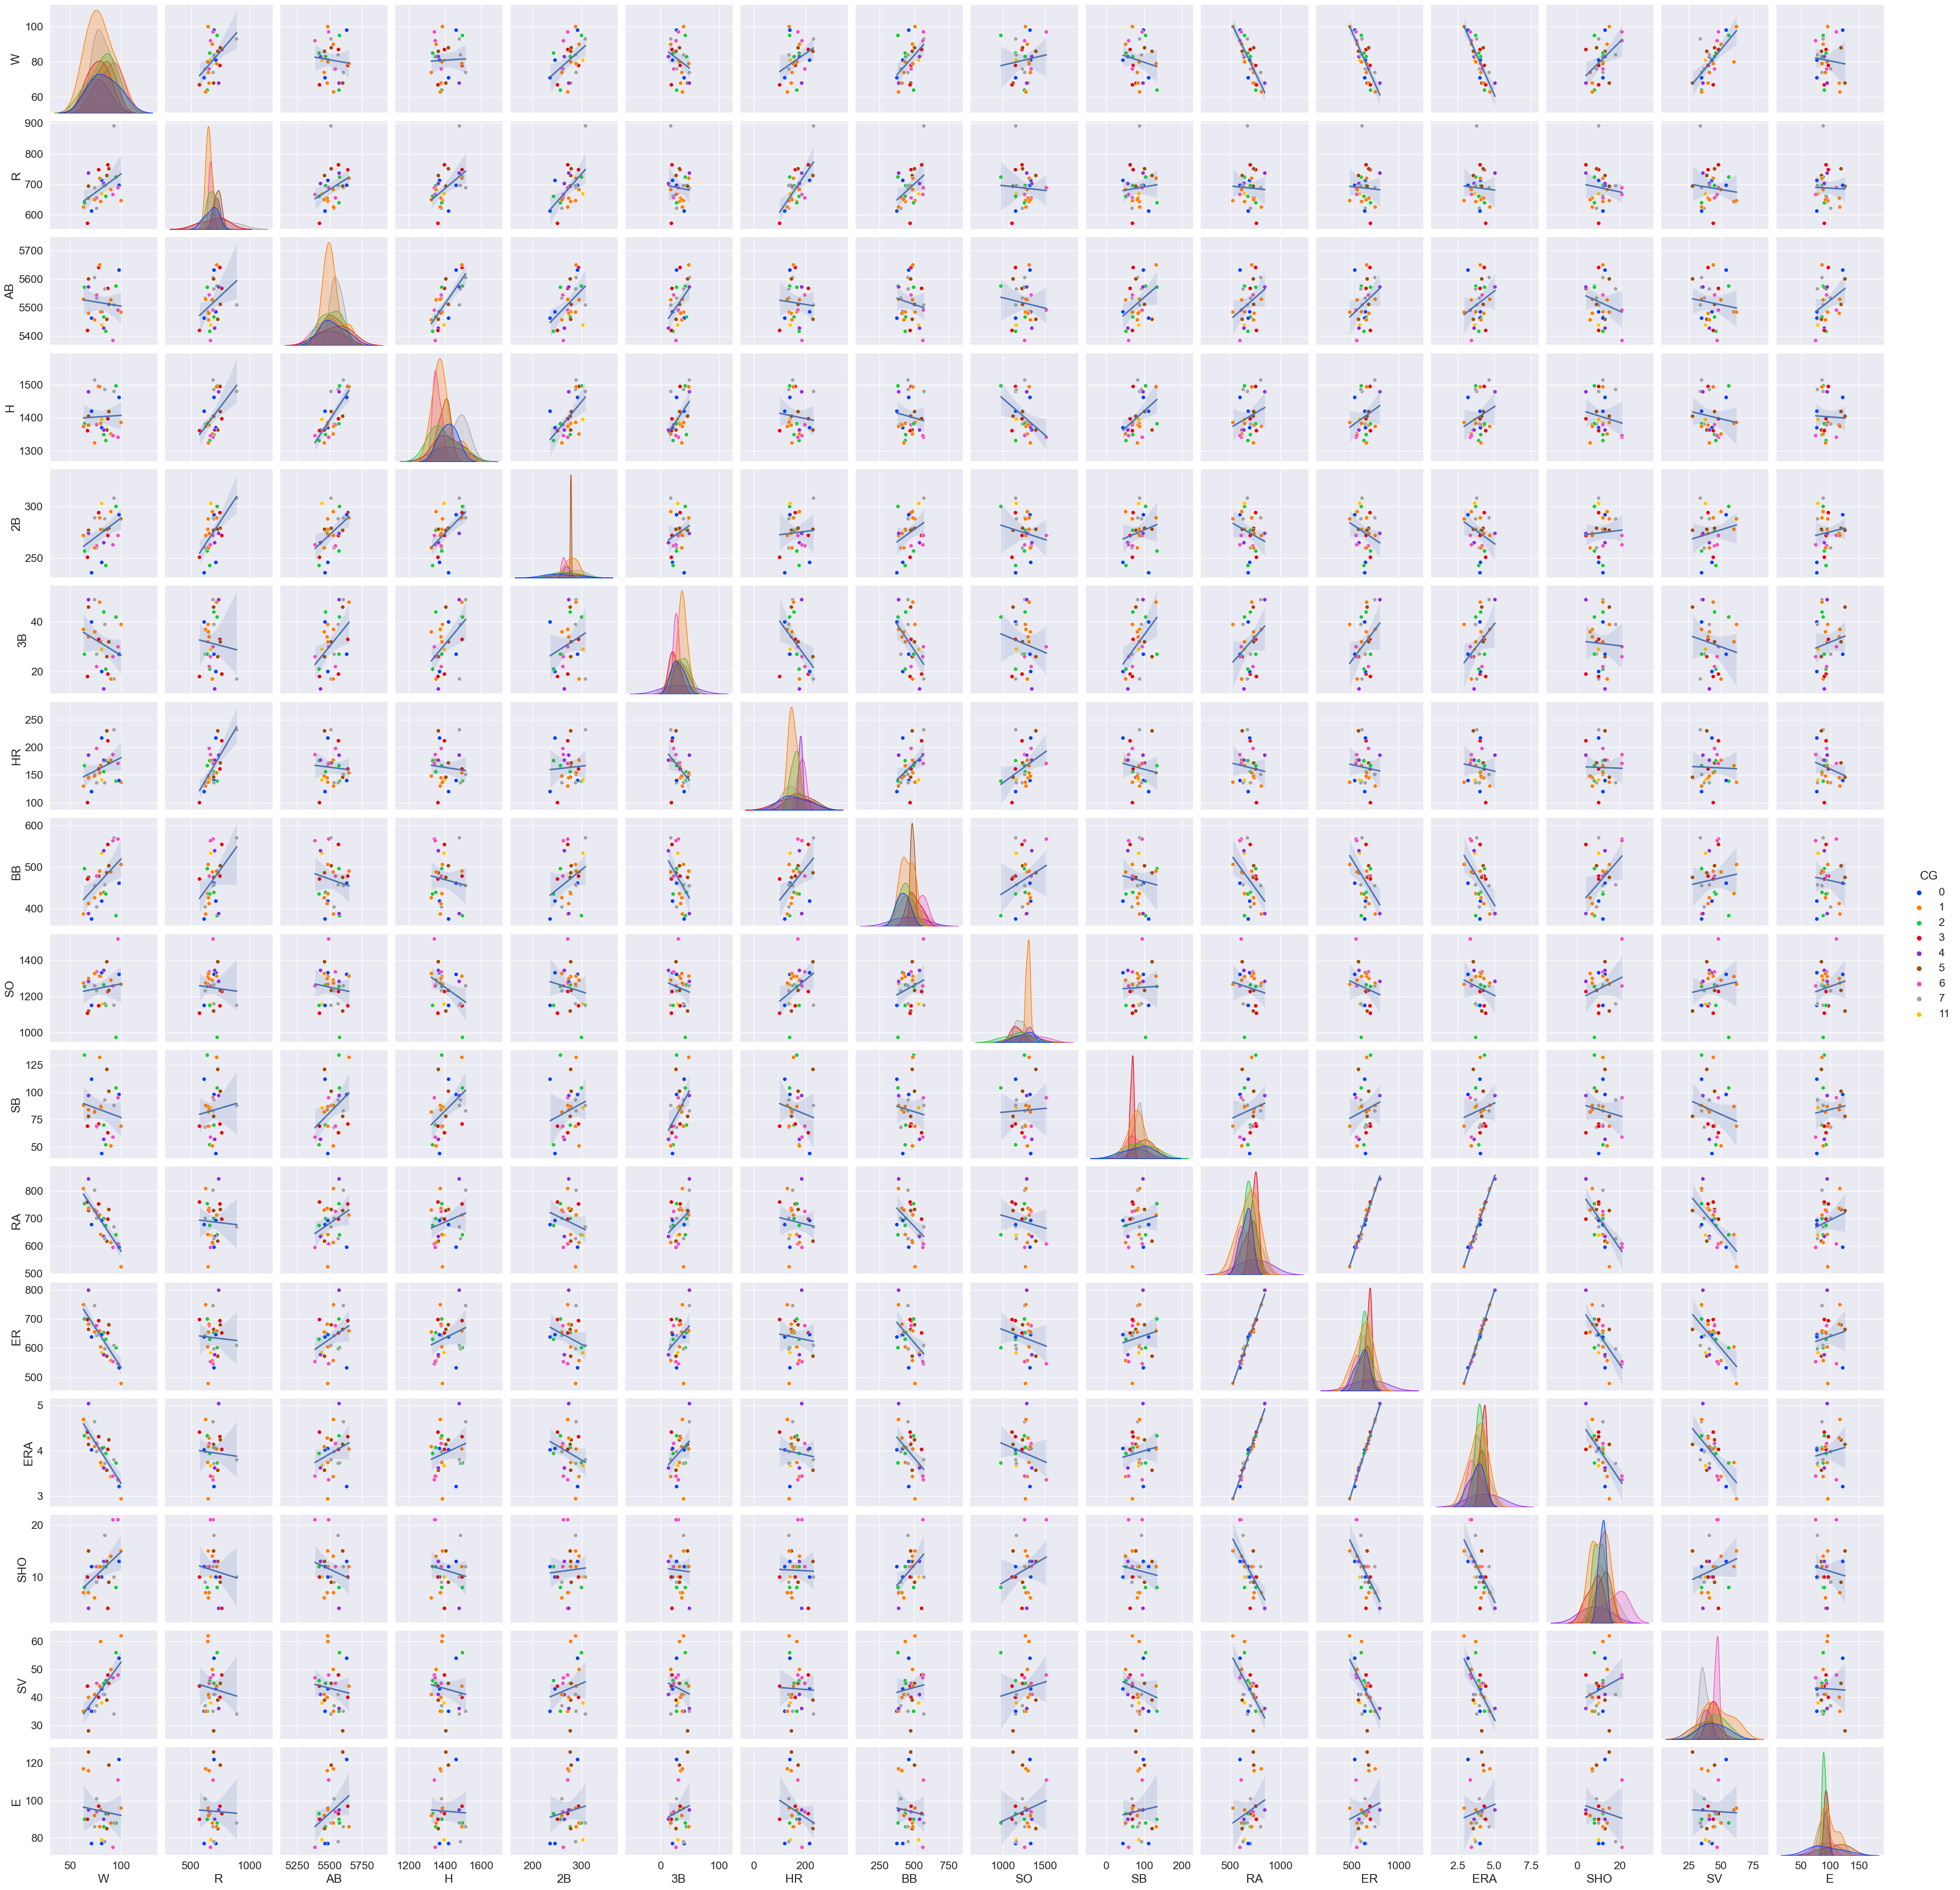

In [124]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, hue = "CG", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

There is a strong positive relationship between ER, ERA and RA.

#### 1.4.3.2 Correlation between target variable and independent variables

In [100]:
# Calculate the correlation between features
cor = df.corr()
cor

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.430751 -0.087947  0.037612  0.427797 -0.251118  0.307407   
R    0.430751  1.000000  0.319464  0.482856  0.560084 -0.070072  0.671283   
AB  -0.087947  0.319464  1.000000  0.739122  0.453370  0.435422 -0.066983   
H    0.037612  0.482856  0.739122  1.000000  0.566847  0.478694 -0.090855   
2B   0.427797  0.560084  0.453370  0.566847  1.000000  0.220490  0.056292   
3B  -0.251118 -0.070072  0.435422  0.478694  0.220490  1.000000 -0.430915   
HR   0.307407  0.671283 -0.066983 -0.090855  0.056292 -0.430915  1.000000   
BB   0.484342  0.402452 -0.136414 -0.118281  0.302700 -0.454949  0.425691   
SO   0.111850 -0.054726 -0.106022 -0.398830 -0.150752 -0.141196  0.359923   
SB  -0.157234  0.081367  0.372618  0.413444  0.195027  0.457437 -0.136567   
RA  -0.812952 -0.041623  0.316010  0.224324 -0.218160  0.314125 -0.103903   
ER  -0.809435 -0.041245  0.309686  0.252489 -0.235531  0.340225 -0.085922   
ERA -0.819600 -0.049281  0.255551  0.231172 -0.254854  0.330951 -0.090917   
CG   0.080533  0.232042 -0.080876  0.147955  0.306675 -0.065898  0.156502   
SHO  0.471805 -0.103274 -0.197321 -0.145559  0.057998 -0.041396 -0.019119   
SV   0.666530 -0.096380 -0.106367 -0.130371  0.171576 -0.142370 -0.028540   
E   -0.089485 -0.023262  0.316743 -0.033173  0.105754  0.126678 -0.207597   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.484342  0.111850 -0.157234 -0.812952 -0.809435 -0.819600  0.080533   
R    0.402452 -0.054726  0.081367 -0.041623 -0.041245 -0.049281  0.232042   
AB  -0.136414 -0.106022  0.372618  0.316010  0.309686  0.255551 -0.080876   
H   -0.118281 -0.398830  0.413444  0.224324  0.252489  0.231172  0.147955   
2B   0.302700 -0.150752  0.195027 -0.218160 -0.235531 -0.254854  0.306675   
3B  -0.454949 -0.141196  0.457437  0.314125  0.340225  0.330951 -0.065898   
HR   0.425691  0.359923 -0.136567 -0.103903 -0.085922 -0.090917  0.156502   
BB   1.000000  0.233652 -0.098347 -0.416445 -0.452663 -0.459832  0.462478   
SO   0.233652  1.000000  0.030968 -0.129745 -0.161612 -0.180368 -0.093418   
SB  -0.098347  0.030968  1.000000  0.132290  0.143068  0.126063 -0.020783   
RA  -0.416445 -0.129745  0.132290  1.000000  0.991018  0.986674 -0.016659   
ER  -0.452663 -0.161612  0.143068  0.991018  1.000000  0.997248 -0.020221   
ERA -0.459832 -0.180368  0.126063  0.986674  0.997248  1.000000 -0.009856   
CG   0.462478 -0.093418 -0.020783 -0.016659 -0.020221 -0.009856  1.000000   
SHO  0.426004  0.237721 -0.106563 -0.636862 -0.630192 -0.630833  0.241676   
SV   0.099445  0.126297 -0.183418 -0.616224 -0.589663 -0.607005 -0.367766   
E   -0.075685  0.155133  0.079149  0.198996  0.136921  0.113137 -0.140047   

          SHO        SV         E  
W    0.471805  0.666530 -0.089485  
R   -0.103274 -0.096380 -0.023262  
AB  -0.197321 -0.106367  0.316743  
H   -0.145559 -0.130371 -0.033173  
2B   0.057998  0.171576  0.105754  
3B  -0.041396 -0.142370  0.126678  
HR  -0.019119 -0.028540 -0.207597  
BB   0.426004  0.099445 -0.075685  
SO   0.237721  0.126297  0.155133  
SB  -0.106563 -0.183418  0.079149  
RA  -0.636862 -0.616224  0.198996  
ER  -0.630192 -0.589663  0.136921  
ERA -0.630833 -0.607005  0.113137  
CG   0.241676 -0.367766 -0.140047  
SHO  1.000000  0.221639 -0.115716  
SV   0.221639  1.000000 -0.025636  
E   -0.115716 -0.025636  1.000000

In [101]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'W')]

Feature A Feature B  Corr coef
0           W         W   1.000000
28          W        SV   0.666530
33          W        BB   0.484342
40          W       SHO   0.471805
49          W         R   0.430751
52          W        2B   0.427797
79          W        HR   0.307407
131         W        SO   0.111850
140         W        CG   0.080533
148         W         H   0.037612
191         W        AB  -0.087947
194         W         E  -0.089485
237         W        SB  -0.157234
254         W        3B  -0.251118
283         W        ER  -0.809435
286         W        RA  -0.812952
287         W       ERA  -0.819600

Here is the list of the correlation coefficients with the target variable to have a clear view of which dependent variables have more influence on the label. The most predominant features are ERA with -0.819 and SV with 0.666. The one with the lowest incidence is H with -0.037.

#### 1.4.3.3 Correlation heatmap

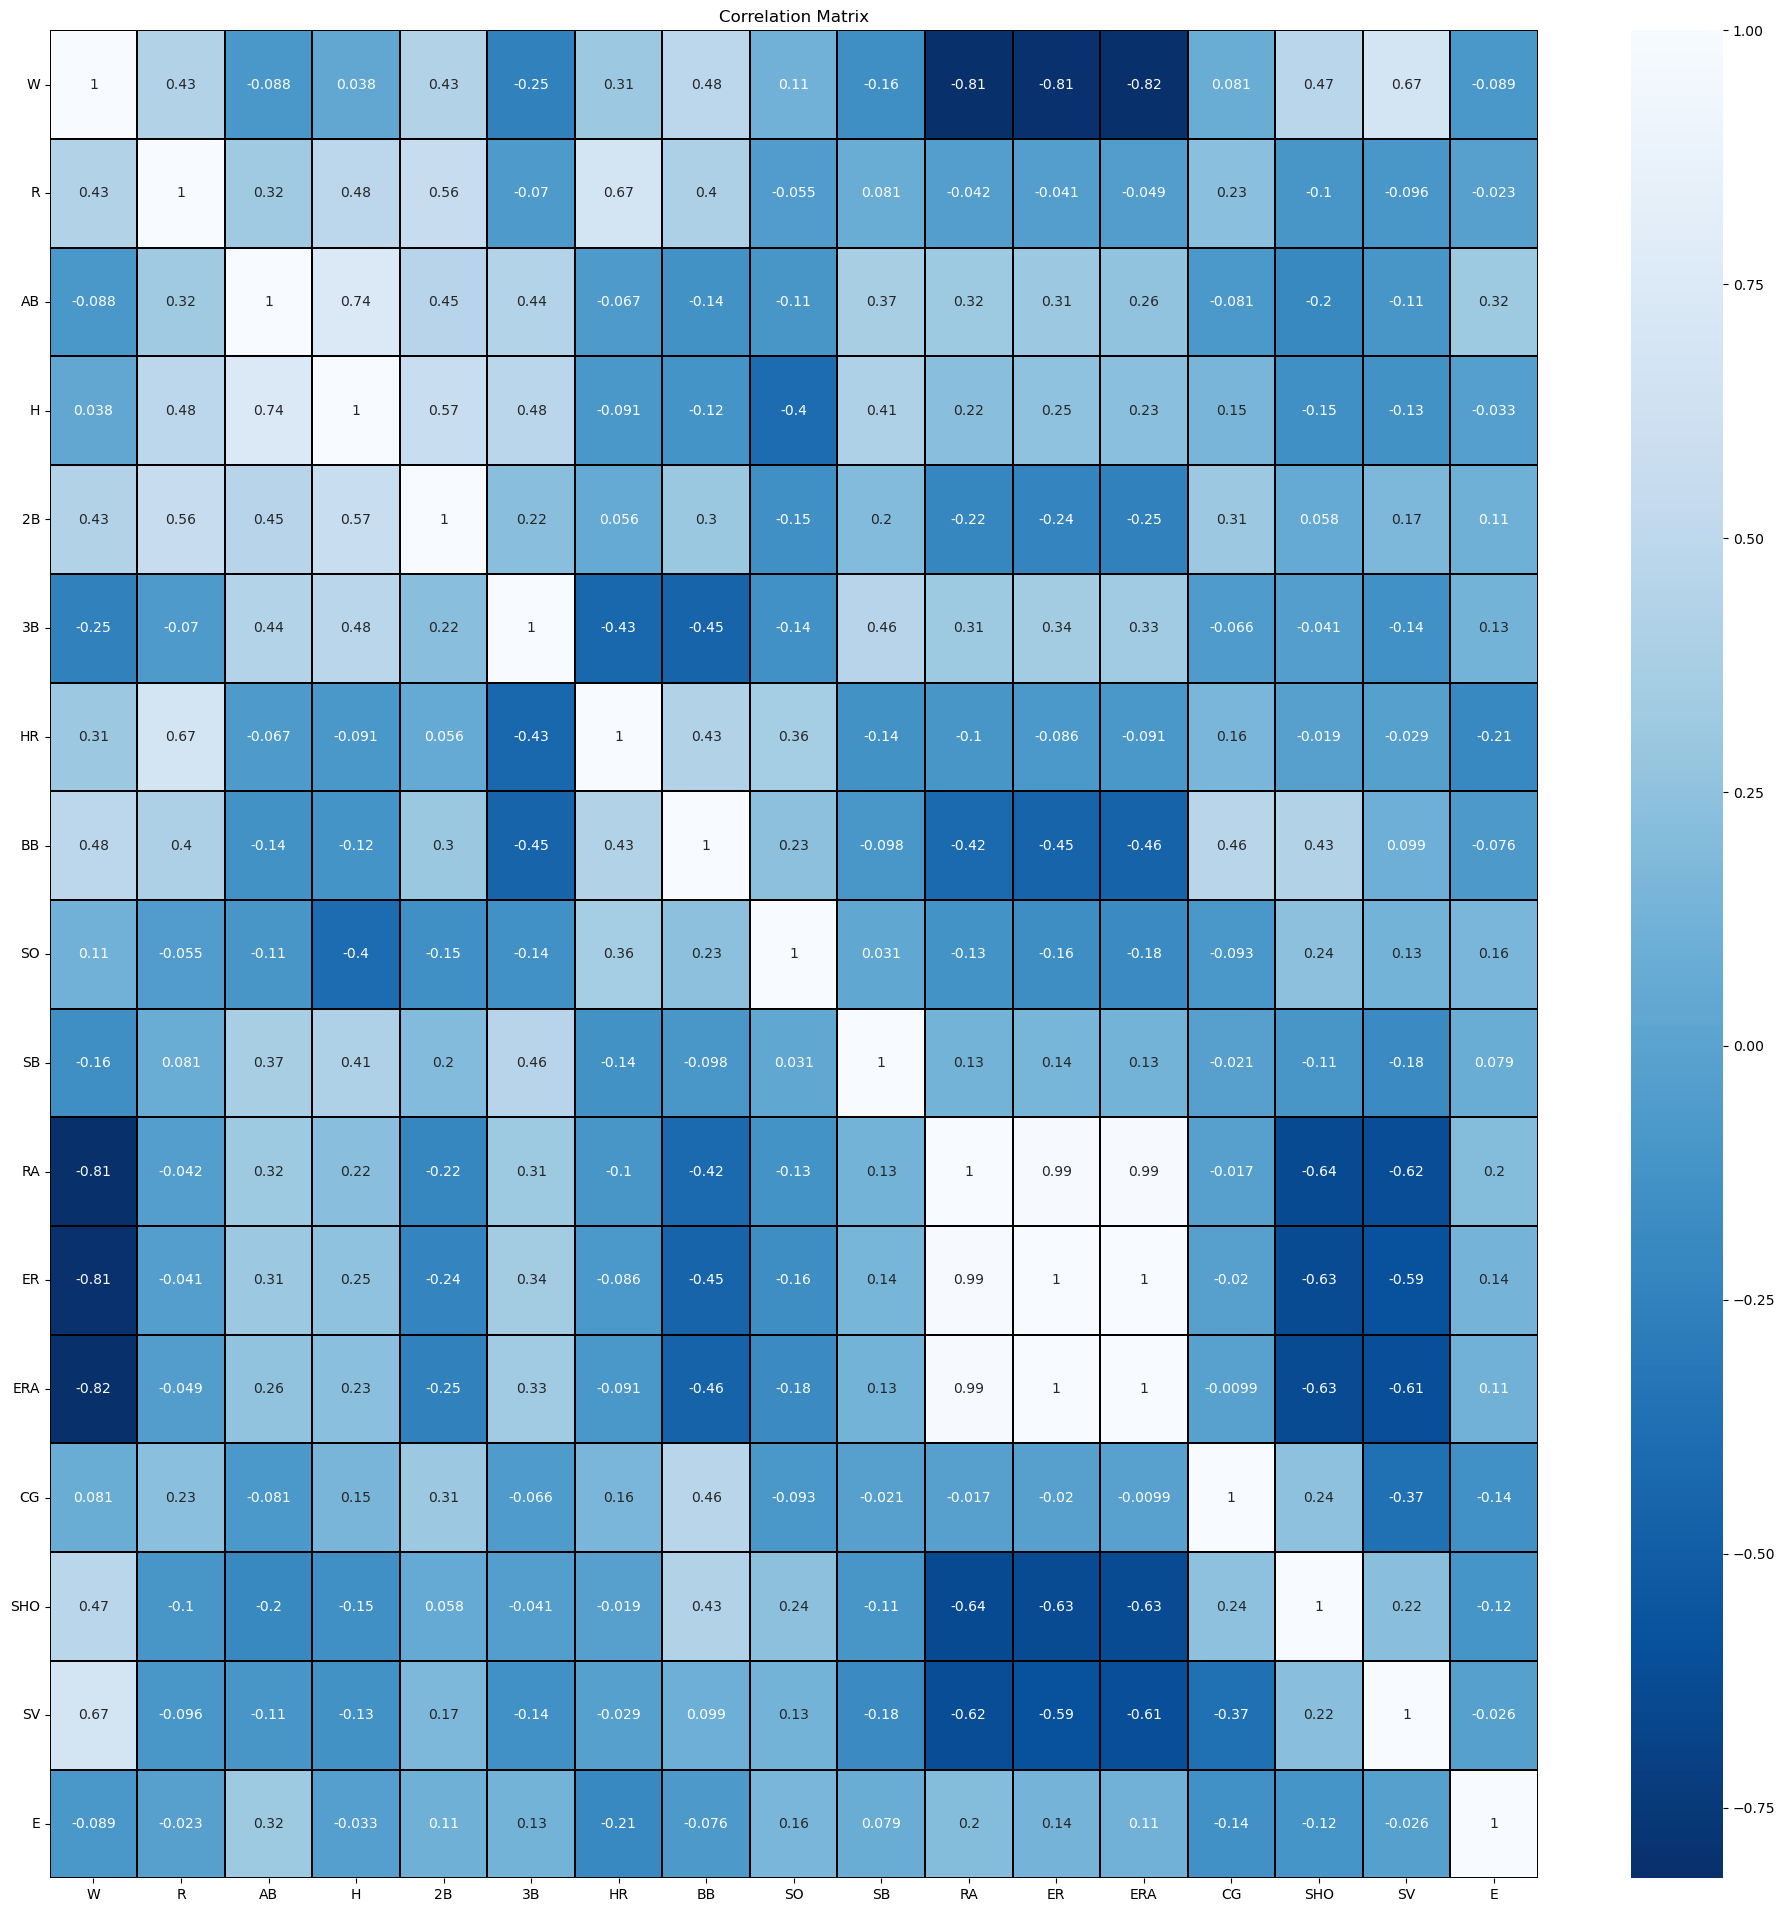

In [102]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2g", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.

- This heatmap contains both positive and negative correlation.
- The target is negatively correlated with ERA(-0.82), ER(-0.81), and RA(-0.81), and is positively correlated with  SV(0.67)
- The features RA, ER, and ERA are highly correlated (0.99)

In [128]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] != corr_df['Feature B'] )].head(20)

Feature A Feature B  Corr coef
17       ERA        ER   0.997248
18        ER       ERA   0.997248
19        ER        RA   0.991018
20        RA        ER   0.991018
21        RA       ERA   0.986674
22       ERA        RA   0.986674
23         H        AB   0.739122
24        AB         H   0.739122
25         R        HR   0.671283
26        HR         R   0.671283
27        SV         W   0.666530
28         W        SV   0.666530
29        2B         H   0.566847
30         H        2B   0.566847
31        2B         R   0.560084
32         R        2B   0.560084
33         W        BB   0.484342
34        BB         W   0.484342
35         H         R   0.482856
36         R         H   0.482856

These are the 20 highest positive correlations between features.

In [129]:
corr_df[(corr_df['Feature A'] != corr_df['Feature B'] )].tail(20)

Feature A Feature B  Corr coef
269       ERA        BB  -0.459832
270        BB       ERA  -0.459832
271        ER        SV  -0.589663
272        SV        ER  -0.589663
273       ERA        SV  -0.607005
274        SV       ERA  -0.607005
275        RA        SV  -0.616224
276        SV        RA  -0.616224
277       SHO        ER  -0.630192
278        ER       SHO  -0.630192
279       SHO       ERA  -0.630833
280       ERA       SHO  -0.630833
281       SHO        RA  -0.636862
282        RA       SHO  -0.636862
283         W        ER  -0.809435
284        ER         W  -0.809435
285        RA         W  -0.812952
286         W        RA  -0.812952
287         W       ERA  -0.819600
288       ERA         W  -0.819600

These are the 20 highest negative correlations between features

# 2. Preprocessing Data
## 2.1 Missing values
In Section 1.2 we verify that the dataset has no missing values.

In [130]:
df.isnull().sum().sum()

0

No missing values to remove.

## 2.2  Removing outliers

In [131]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

W         R        AB         H        2B        3B        HR  \
0   1.365409  0.619078  0.847731  1.663685  1.420173  1.041193  0.787299   
1   0.197838  0.134432  0.711094  0.970681  0.127403  1.235809  0.243967   
2   0.003243  0.332906  1.115233  0.151891  1.588795  0.223808  0.723377   
3   0.483244  1.146419  0.241522  0.401088  0.828122  0.418423  0.883181   
4   0.677839  0.013270  1.280738  1.984081  0.801892  1.722347  0.403770   
5   1.170814  3.509647  0.104884  1.361089  1.869832  1.391501  2.185047   
6   0.587028  1.311430  0.732263  0.116292  0.153633  1.196885  1.545833   
7   0.003243  0.428681  0.451289  0.596886  1.615025  1.099578  1.705636   
8   0.094054  0.765626  0.451289  0.365489  0.183611  0.068115  0.107601   
9   0.288649  1.034489  1.785913  1.628086  1.082929  0.165423  0.084163   
10  0.684326  1.086415  0.076017  0.275303  0.239818  0.068115  0.267405   
11  0.489731  0.705622  0.826562  0.721484  0.183611  0.515731  2.121125   
12  0.392433  0.471376  1.432772  1.291077  1.783647  1.002270  0.395247   
13  0.483244  0.557920  0.400291  0.436688  0.715707  0.904962  1.098383   
14  1.261625  0.099814  1.208570  0.026106  0.127403  1.430424  0.563574   
15  1.851896  0.713699  0.465723  0.312089  0.745685  0.749270  0.851220   
16  1.657301  0.151740  1.656011  1.040693  0.970514  0.418423  0.755338   
17  1.560004  0.013270  0.364688  1.113079  0.153633  0.126500  0.235444   
18  1.261625  0.575229  0.523457  0.454487  0.041219  0.262731  0.595534   
19  1.650815  0.834861  0.789997  0.383288  0.996744  0.418423  0.107601   
20  0.878921  0.090583  0.154920  0.935081  1.139136  1.391501  0.427208   
21  0.197838  0.255593  1.274002  0.721484  0.547085  1.780732  0.427208   
22  0.969732  1.302198  0.768828  0.293103  2.177099  0.846578  1.394552   
23  1.358922  1.994550  1.389471  0.757084  1.333988  1.294193  2.033766   
24  1.748112  1.077184  0.183787  0.525687  0.153633  0.554654  1.074945   
25  1.073516  0.367523  1.894646  1.024080  0.659500  0.515731  0.746815   
26  0.295136  0.134432  0.703396  1.467888  0.745685  0.749270  0.883181   
27  0.191352  0.549843  1.915815  1.610286  0.801892  1.625040  0.307888   
28  0.677839  0.661773  0.855429  1.415675  0.828122  0.457346  0.499652   
29  1.261625  0.844092  0.804431  1.343289  0.041219  1.722347  0.714854   

          BB        SO        SB        RA        ER       ERA        CG  \
0   1.534902  2.697630  0.913883  0.666234  0.505110  0.506955  0.539806   
1   0.536592  0.154878  0.601826  0.165971  0.248930  0.254598  0.539806   
2   1.139144  0.893982  0.111449  0.680339  0.751623  0.641347  2.772641   
3   1.160536  0.168602  0.690985  0.180076  0.103922  0.053010  1.300442   
4   0.251360  0.105866  0.022290  1.618803  1.597501  1.531318  1.300442   
5   1.798742  0.952796  0.200609  0.257184  0.389104  0.350165  1.300442   
6   1.513510  0.207812  0.913883  0.137760  0.234429  0.165003  0.171757   
7   0.910958  0.811641  1.760897  0.067235  0.147424  0.209800  1.275906   
8   0.590073  0.605790  0.156029  0.652129  0.461608  0.484557  0.907856   
9   0.158660  0.982204  0.557246  0.913544  0.843461  0.792164  0.171757   
10  0.604334  0.148997  0.780144  0.631441  0.640451  0.635374  0.564343   
11  0.301276  1.409590  1.671738  0.990653  0.925632  0.865333  0.564343   
12  0.607900  0.962599  1.404260  0.186658  0.084588  0.036584  0.539806   
13  0.158660  0.860654  0.646405  0.532705  0.596948  0.456185  0.932393   
14  0.105179  1.266474  0.245188  0.575021  0.408438  0.411388  0.564343   
15  0.657815  0.184286  0.646405  2.302433  2.288705  2.276445  0.907856   
16  0.144398  0.723420  0.646405  1.300966  1.505663  1.671683  1.275906   
17  1.745261  2.644696  0.512666  1.131704  1.302652  1.335704  0.932393   
18  1.017920  0.497964  0.022290  0.687862  0.669452  0.724968  0.907856   
19  0.479546  0.066657  2.251273  0.927650  0.930466  0.836961  0.539806   
20  0.336930  0.409742  1.448839  1.061179  1.143144  1.17

In [134]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

1 rows with outliers were deleted.
This represent 3.33% of the data.
In the new dataset there are 29 rows and 17 columns.


W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

## 2.3 Skewness Correction

In [135]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
CG   0.854980
E    0.840271
H    0.783772
SV   0.627480
SHO  0.526943
SB   0.494966
HR   0.450862
AB   0.169573
BB   0.151193
W    0.119013
3B   0.090124
ER   0.018461
RA   0.018155
ERA  0.016693
R   -0.215364
SO  -0.233815
2B  -0.335304

We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness.

In [136]:
# Subsetting the features with a skew > 0.5
df_skew[df_skew['Skew'] > 0.5]

Skew
CG   0.854980
E    0.840271
H    0.783772
SV   0.627480
SHO  0.526943

In [137]:
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['CG', 'E', 'H', 'SHO', 'SV']

Since we considered the features CG and SHO as categorical we do not need to remove the skewness.

In [147]:
skew_columns = ['E', 'H', 'SV']

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [148]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

We will select the best transformation method looking for the minimum absolute value of skewness.

In [150]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^([A-Z]+)(?:_|$)')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for SV
display(df_comp)

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness feature  Skewness_abs
0   SV_sqrt  0.370280      SV      0.370280
1    SV_log  0.096752      SV      0.096752
2   SV_cbrt  0.280963      SV      0.280963
3        SV  0.627480      SV      0.627480
4    H_sqrt  0.761274       H      0.761274
5     H_log  0.738423       H      0.738423
6    H_cbrt  0.753696       H      0.753696
7         H  0.783772       H      0.783772
8    E_sqrt  0.714966       E      0.714966
9     E_log  0.583308       E      0.583308
10   E_cbrt  0.671748       E      0.671748
11        E  0.840271       E      0.840271

index  Skewness feature  Skewness_abs
9   E_log  0.583308       E      0.583308
5   H_log  0.738423       H      0.738423
1  SV_log  0.096752      SV      0.096752

For each skewness column, we obtain the better transform method. We can observe the best method to remove the skewness is the log method.

In [151]:
skew_columns

['E', 'H', 'SV']

In [152]:
# Update the df dataset with the transfor data with log method.
for col in skew_columns:
    df[col] = np.log(df[col])

In [153]:
# This is the new skewness for the transformed columns
df[skew_columns].skew()

E     0.583308
H     0.738423
SV    0.096752
dtype: float64

After update the df dataset with the transform data with log method, we can continue with the analysis.

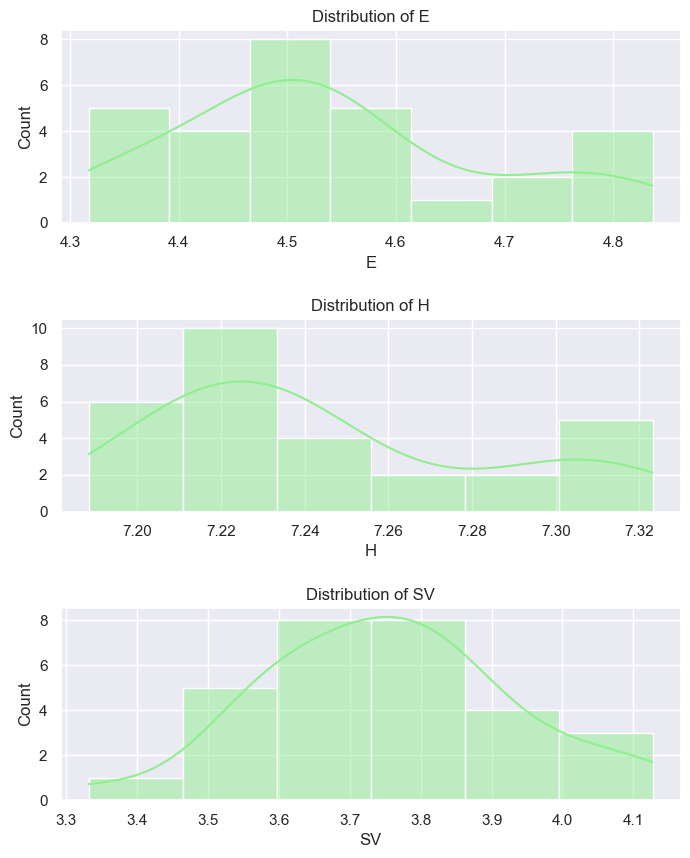

In [158]:
sns.set(font_scale=1) 

# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='lightgreen')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.4 Feature Scaling using Standard Scalarization
### 2.4.1 Separating features and label

In [159]:
# Separating the independent and target variables into x and y 
x = df.drop("W", axis=1)
y = df['W']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (29, 16)
Label Dimension = (29,)


### 2.4.2 Scaling

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} dataset {'*'*30}")
display(x.head())



****************************** dataset ******************************


R        AB         H        2B        3B        HR        BB  \
0  0.959398  0.830084  1.723715  1.556538  1.010845 -0.765863 -1.536359   
1  0.331147 -0.702831 -0.949854  0.201171  1.208917 -0.181389 -0.495021   
2 -0.274666 -1.100253 -0.088687  1.733325 -0.276617 -0.697101  1.252941   
3 -1.329231  0.233951 -0.347738 -0.800621 -0.474688 -0.869006 -1.145857   
4  0.174084  1.255894  2.030685  0.908319  1.704094 -0.353293 -0.197495   

         SO        SB        RA        ER       ERA        CG       SHO  \
0 -2.727623  0.905953 -0.664514 -0.511148 -0.511388 -0.501486 -0.813262   
1  0.121896 -0.585315  0.154638  0.232161  0.238952 -0.501486  0.159299   
2 -0.925866  0.116458 -0.678397 -0.754153 -0.643801  2.854612 -0.326982   
3 -0.201246 -0.673037  0.168522  0.089217  0.040333  1.363013 -0.570122   
4  0.072935 -0.015124  1.584683  1.561540  1.496876  1.363013  0.159299   

         SV         E  
0  1.552157 -0.435290  
1  0.298007 -0.597850  
2 -0.671621 -1.198180  
3 -0.824559  0.538988  
4 -1.143244 -0.597850

## 2.5 Muticollinearity Analysis and Feature Selection

### 2.5.1 Checking Variance Inflation Factor (VIF)

In [162]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features   VIF values
10       ER  2071.748973
11      ERA  1627.785442
9        RA   201.931848
1        AB    20.621424
2         H    10.553104
5        HR     8.709208
0         R     7.201535
14       SV     6.445819
3        2B     3.749228
13      SHO     3.532911
4        3B     3.347143
6        BB     3.318494
12       CG     3.011459
7        SO     2.795299
15        E     2.087423
8        SB     2.044536

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features ER, ERA, RA, AB, and H have VIF value greater than 10 which means they have high correlation with other features. 

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [163]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'W') & (corr_df['Feature B'].isin(['ER', 'ERA', 'RA', 'AB', 'H'])) ]

Feature A Feature B  Corr coef
148         W         H   0.037612
191         W        AB  -0.087947
283         W        ER  -0.809435
286         W        RA  -0.812952
287         W       ERA  -0.819600

In [165]:
# Dropping the columns with multicollinearity
x = x.drop(['ERA'], axis=1) 

We drop the column 'ERA' to solve the multicollinearity problem. 

In [166]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
9        RA  188.888069
10       ER  181.392930
2         H    8.843923
5        HR    8.210422
0         R    6.491551
1        AB    5.383614
3        2B    3.471944
12      SHO    3.452374
13       SV    3.330058
4        3B    3.307360
6        BB    3.283357
7        SO    2.794165
11       CG    2.586793
14        E    2.067858
8        SB    1.903324

Dropping ERA feature does not solve the multicollinearity issue completely. Now we will drop the feature with the highest VIF value.

In [167]:
# Dropping the columns with highest VIF value
x = x.drop(['RA'], axis=1)

In [168]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
2         H    8.124247
0         R    6.320350
5        HR    6.231301
1        AB    5.035726
9        ER    4.483533
3        2B    3.412116
4        3B    3.217160
11      SHO    3.134764
6        BB    3.010198
12       SV    2.707293
10       CG    2.556112
7        SO    2.133765
13        E    2.007694
8        SB    1.790319

Now the multicollinearity issue was addressed we can now move ahead to model building. 

# 3. Modeling

In [169]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 3.1 Finding the best random state

In [170]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.9174 at random_state 104


Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 3.2 Creating train test split

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (20, 14)
x_test shape:   (9, 14)
y_train shape:  (20,)
y_test shape:   (9,)


## 3.3 Regression Algoritms

In [172]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

### 3.3.1 Linear Regression

In [173]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [ 5.40116218  0.78772257 -1.16955909 -2.66928938  1.52090462 -1.56827661
 -0.68022051  0.19844501 -0.54129493 -5.31465196  3.16056411  0.32290641
  5.76529053 -0.04879969]

LR intercept_ : 80.04323609532807
LR score train  : 0.9348180947871827
LR score test   : 0.9173940715901197
********** E R R O R **********
Mean squared error: 10.9223
Root Mean squared error: 3.3049
Cross-validation results (R2): [ 8.52479068e-01 -7.64206036e-02 -2.22804325e+01 -1.28397154e+01
  4.94735988e-01  8.35302469e-01  7.88689109e-01  1.05423669e-02
 -8.47547541e-02  9.45008368e-01]
Average R2: -3.1355
R2_Score(test): 0.9174


### 3.3.2 Random Forest Regressor

In [174]:
%%time
rfr = RandomForestRegressor()
parameters = {'n_estimators':[100, 600, 1000], # Number of trees in the forest
             'max_features': ["auto"],
             'max_depth':[None, 40, 50, 60], # Maximum depth of the trees
             'min_samples_split': [5, 7, 9], # Minimum number of samples required to split an internal node
             'min_samples_leaf': [7, 10, 12], # Minimum number of samples required to be at a leaf node
             'criterion': ['mse'],
             'bootstrap': [True, False]}  # Whether to use bootstrap samples when building trees

grid_cv = GridSearchCV(estimator = rfr, param_grid=parameters, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)

Wall time: 2min 37s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mse'],
                         'max_depth': [None, 40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [100, 600, 1000]})

In [175]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', min_samples_leaf=7,
                      min_samples_split=5, n_estimators=1000)

In [176]:
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 1000}
Best score : -0.1979473067006224
Best Estimator:  RandomForestRegressor(bootstrap=False, criterion='mse', min_samples_leaf=7,
                      min_samples_split=5, n_estimators=1000)
********** E R R O R **********
Mean squared error: 104.5488
Root Mean squared error: 10.2249
Cross-validation results (R2): -0.1979473067006224
Average R2: -0.1979
R2_Score(test): 0.2093


### 3.3.3 Decision Tree Regressor

In [177]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 74.5556
Root Mean squared error: 8.6346
Cross-validation results (R2): [ -1.7375     -11.92105263   0.26139691   0.90327869   0.36910377]
Average R2: -2.4250
R2_Score(test): 0.4361


### 3.3.4 K Neighbors Regressor

In [178]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 64.2711
Root Mean squared error: 8.0169
Cross-validation results (R2): [ 0.18768182 -2.25421053  0.40784609  0.29665574  0.77216981]
Average R2: -0.1180
R2_Score(test): 0.5139


### 3.3.5 Gradient Boosting Regressor

In [179]:
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 45.6433
Root Mean squared error: 6.7560
Cross-validation results (R2): [-0.02706748 -8.16696742  0.46529569  0.60744898  0.80768079]
Average R2: -1.2627
R2_Score(test): 0.6548


### 3.3.6 Lasso

In [180]:
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 22.9737
Root Mean squared error: 4.7931
Cross-validation results (R2): [ 0.725568   -0.64034897  0.78097605  0.7768585   0.89619608]
Average R2: 0.5078
R2_Score(test): 0.8262


### 3.3.7 Ridge

In [181]:
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 14.4275
Root Mean squared error: 3.7984
Cross-validation results (R2): [ 0.55559987 -0.84731238  0.69494832  0.91208053  0.8349805 ]
Average R2: 0.4301
R2_Score(test): 0.8909


### 3.3.8 Support Vector Regressor

In [182]:
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 124.2137
Root Mean squared error: 11.1451
Cross-validation results (R2): [-0.09872096 -1.18197552 -0.01413032 -0.46553338  0.16381274]
Average R2: -0.3193
R2_Score(test): 0.0606


In [183]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
5                        Lasso   
6                        Ridge   
3        K Neighbors Regressor   
1      Random Forest Regressor   
7                          SVR   
4  Gradient Boosting Regressor   
2      Decision Tree Regressor   
0             LinearRegression   

                                               Model       RMSE  \
5                                            Lasso()   4.793090   
6                                            Ridge()   3.798361   
3                              KNeighborsRegressor()   8.016927   
1  (DecisionTreeRegressor(max_features='auto', mi...  10.224908   
7                                              SVR()  11.145120   
4  ([DecisionTreeRegressor(criterion='friedman_ms...   6.755981   
2            DecisionTreeRegressor(random_state=104)   8.634556   
0                                 LinearRegression()   3.304896   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
5        0.826249  0.507850       0.318399  
6        0.890884  0.430059       0.460825  
3        0.513916 -0.117971       0.631887  
1        0.209295 -0.197947       0.407242  
7        0.060569 -0.319309       0.379878  
4        0.654799 -1.262722       1.917521  
2        0.436134 -2.424955       2.861089  
0        0.917394 -3.135457       4.052851

From the summary of models results and compare the cross-validation scores and R2 score, we conclude **Lasso is our best performing model.**

## 3.4 Hyper Parameter Tuning
### 3.4.1 Finding the best parameters for Lasso

In [184]:
random_state

104

Get a list of hyper parameters for Lasso:

In [188]:
model = Lasso()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [206]:
%%time
# Lasso Regression
param_grid = {'alpha': [1.0,.05,.4,2], 
              'fit_intercept':[True, False], 
              'max_iter': [1000, 1200, 1500],
              'positive': [False,True],
              'random_state': [1,10,20,random_state],
              'selection':['cyclic','random'],
              'tol': [0.0001, 0.00001, 0.000001]}

# Build the model 
model = Lasso()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

Wall time: 10.2 s


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 1200, 1500],
                         'positive': [False, True],
                         'random_state': [1, 10, 20, 104],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [207]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for Lasso model:")
best_params

Best Parameters for Lasso model:


{'alpha': 0.4,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'random_state': 1,
 'selection': 'cyclic',
 'tol': 0.0001}

These are the best parameters for training the model.

In [208]:
best_model

Lasso(alpha=0.4, random_state=1)

## 3.5 Final Model

In [214]:
# Create the model with the best parameters
best_model = Lasso(alpha = 0.4, fit_intercept = True, max_iter = 1000, positive = False, random_state = 1, selection = 'cyclic', tol = 0.0001)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.3f}%")

Maximum R2 score: 92.035%


### 3.6.1 Saving the model

In [211]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/baseball_model.pkl")

['models/baseball_model.pkl']

### 3.6.2  Predicting the saved model

In [213]:
# Lets load the saved model and get the predictions
model = joblib.load("models/baseball_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 92.035 %


0          1          2          3          4          5  \
Predicted  90.177695  67.839258  70.806354  89.114113  79.050787  83.288599   
Original   92.000000  64.000000  67.000000  90.000000  76.000000  88.000000   

                   6          7          8  
Predicted  70.149651  92.623388  74.560943  
Original   71.000000  98.000000  74.000000

These are the predicted values in a dataset to compared the prediction with the test data.

**Final Conclusions:**

- The given dataset consists of 16 features in which we are doing uni-variate analysis. The target variable is continuous and the independent variables are numerical too. 
- The dataset does not contain missing values or duplicates.
- The values in the dataset are in different scales.
- Eliminating the outliers represented the elimination of  3.33% of the total records (1 row).
- To remove skewness in columns E, H, and SV we use the log method.
- In order to avoid multicollinearity issues we drop two columns: ERA and RA.
- The final model is Lasso with a R2 score of 92.035%


_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga